<a href="https://colab.research.google.com/github/vrindaa23/projects/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

In [ ]:
#Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv.zip to Tweets.csv (1).zip


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

df = df.rename(columns={
    "textID": "userid",
    "text": "text",
    "sentiment": "label"
})

print("\nRenamed Columns:")
print(df.head())


Renamed Columns:
       userid                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text     label  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [ ]:
#Check Dataset Structure
print("\nDataset Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userid         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   label          27481 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 858.9+ KB

Missing values:
userid           0
text             1
selected_text    1
label            0
dtype: int64


In [ ]:
#Cleaning the data
df.dropna(inplace=True)
df = df.sample(frac=1).reset_index(drop=True)
print("\nAfter cleaning:")
df.head()


After cleaning:


,userid,text,selected_text,label
0,5b8d6e0051,Aww just read your tweet. I`m not sure about ...,Aww,2
1,ffabf61447,MCFLY?!! Aren`t they the best band ever? I w...,MCFLY?!! Aren`t they the best band ever? I wi...,1
2,29e7c7df4f,Snoops uncle who was the COOLEST dancer EVER!!...,COOLEST,2
3,9d7fa735e2,YES I AM GOING TO BE A SOPHMORE IN COLLEGE. Ge...,Geez.,0
4,de55c91013,just got the bouquet of flowers for my mom HE...,HEHEHE SWEET ),2


In [ ]:
TEXT_COL = "text"
LABEL_COL = "label"

# Map string labels to numerical values for multi-class classification
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df[LABEL_COL] = df[LABEL_COL].map(label_mapping)

X = df[TEXT_COL]
y = df[LABEL_COL]

print("Labels mapped for multi-class classification:")
print(df[LABEL_COL].value_counts())

Labels mapped for multi-class classification:
label
1    11118
2     8582
0     7781
Name: count, dtype: int64


In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("\nData Split Done!")


Data Split Done!


In [ ]:
#TF-IDF Vectorisation
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

# Ensure text data is of string type to prevent ValueError from np.nan
X_train_vec = vectorizer.fit_transform(X_train.astype(str))
X_test_vec = vectorizer.transform(X_test.astype(str))

In [ ]:
#Model Training - LogisticRegression supports multi_class='auto' for more than two classes
model = LogisticRegression(max_iter=200, multi_class='auto')
model.fit(X_train_vec, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='auto')

In [ ]:
#Model Evaluation
y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6898308168091687

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65      1562
           1       0.63      0.75      0.68      2230
           2       0.77      0.70      0.73      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497



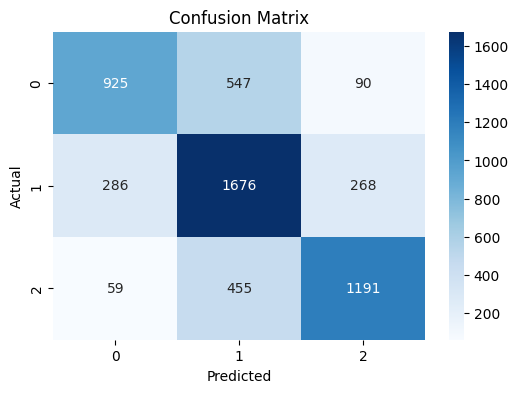

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


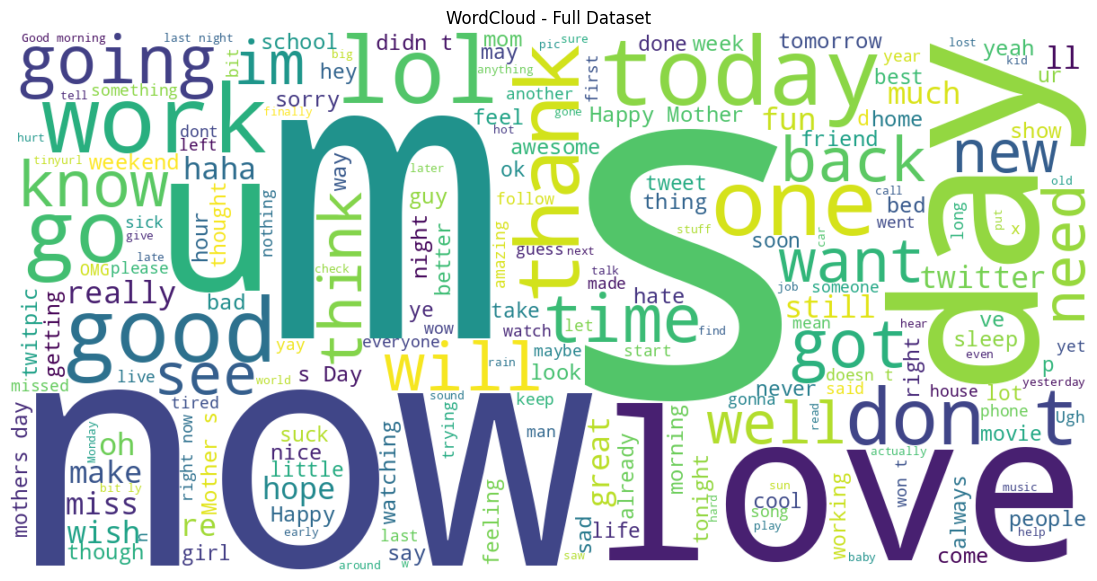

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Wordcloud-full dataset
all_text = " ".join(df[TEXT_COL].astype(str))

wc_all = WordCloud(width=1200, height=600, background_color='white').generate(all_text)

plt.figure(figsize=(14,7))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Full Dataset")
plt.show()
wc_all.to_file("wordcloud_full.png")
files.download("wordcloud_full.png")

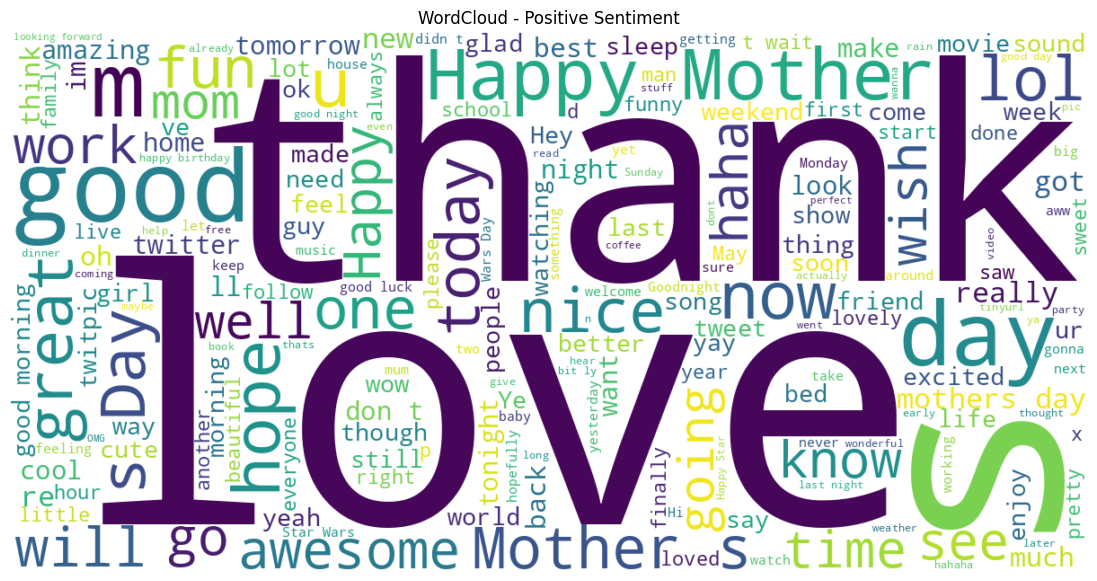

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Wordcloud-positive sentiment
positive_text = " ".join(df[df[LABEL_COL] == label_mapping["positive"]][TEXT_COL].astype(str))

wc_pos = WordCloud(width=1200, height=600, background_color='white').generate(positive_text)

plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Sentiment")
plt.show()

wc_pos.to_file("wordcloud_positive.png")
files.download("wordcloud_positive.png")


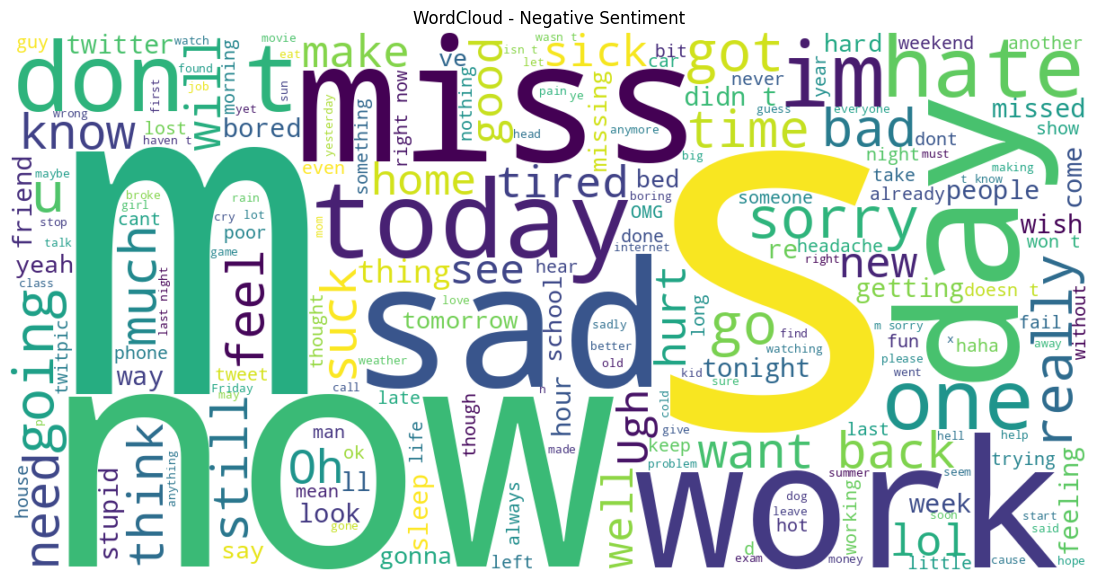

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Wordcloud-negative sentiment
negative_text = " ".join(df[df[LABEL_COL] == label_mapping["negative"]][TEXT_COL].astype(str))

wc_neg = WordCloud(width=1200, height=600, background_color='white').generate(negative_text)

plt.figure(figsize=(14,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Sentiment")
plt.show()

wc_neg.to_file("wordcloud_negative.png")
files.download("wordcloud_negative.png")


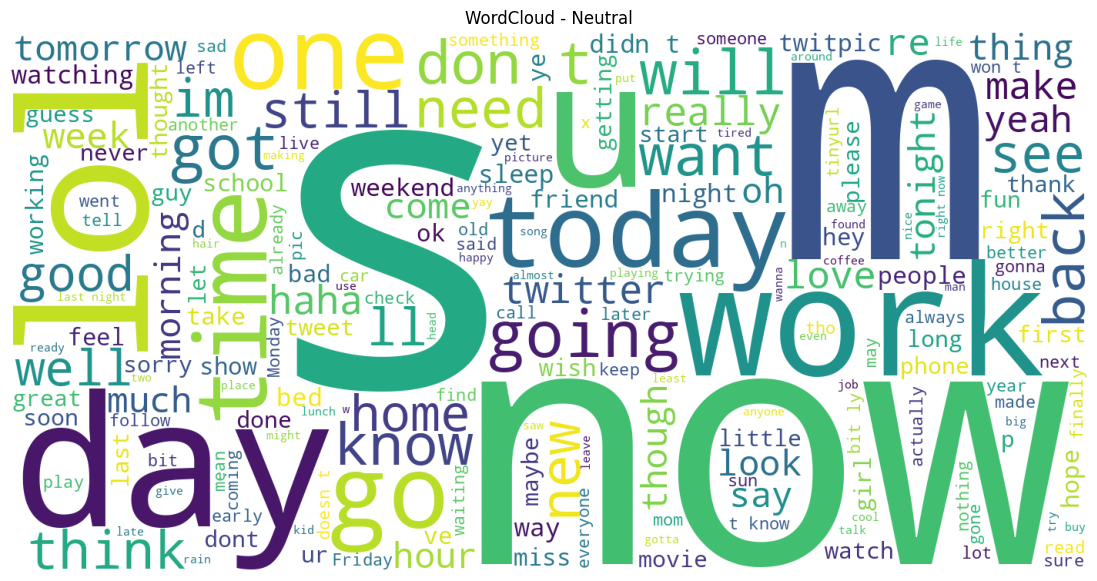

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Wordcloud-neutral sentiment
neu_text = " ".join(df[df[LABEL_COL] == label_mapping["neutral"]][TEXT_COL].astype(str))
wc_neu = WordCloud(width=1400, height=700, background_color='white').generate(neu_text)

plt.figure(figsize=(14,7))
plt.imshow(wc_neu)
plt.axis("off")
plt.title("WordCloud - Neutral")
plt.show()

wc_neu.to_file("wordcloud_neutral.png")
files.download("wordcloud_neutral.png")


In [ ]:
#Custom sentiment prediction
def predict_sentiment(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]

    # Map numerical prediction back to string label
    if pred == label_mapping["positive"]:
        return "Positive 😀"
    elif pred == label_mapping["negative"]:
        return "Negative 😡"
    elif pred == label_mapping["neutral"]:
        return "Neutral 😐"
    else:
        return "Unknown Sentiment 🤔"

print("\nExample Prediction:")

print(predict_sentiment("This is the worst"))
print(predict_sentiment("It is okay, not good or bad"))



Example Prediction:
Negative 😡
Positive 😀
